In [2]:
from dbconnect.connector import Connection

In [3]:
conn = Connection('M0neyMa$e')

In [4]:
data = conn.wsquery("SELECT * FROM whoscored WHERE season=2023 AND competition='EPL' AND event_type=1 AND outcomeType=1")

In [5]:
from footballmodels.clustering.features import  four_factor_model
from footballmodels.model_files import load_model
from footballmodels.opta.passes import is_open_play_pass

In [6]:
X = four_factor_model(data)
model = load_model('pass_kmeans_model')

c:\Users\dmitr\dev\footballmodels\.venv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\dmitr\dev\footballmodels\.venv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\dmitr\dev\footballmodels\.venv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [7]:
data['cluster']=model.predict(X)

In [9]:
len(data)

62436

In [31]:
from mplsoccer import VerticalPitch

In [10]:
PROGRESSIVE_CLUSTERS = [0,3,5,21,22,24,29,33,36,38,40,42,46,48,51,59]
SWITCHING_CLUSTERS = [1,7,9,10,12,15,19,20,23,27,31,32,47,55,57]
DANGER_AREA_CLUSTERS=[2,13,18,25,26,44,50,53]
RECYCLING_CLUSTERS=[4,6,11,14,28,30,37,45,52,54,56]
CONTROL_CLUSTERS=[8,16,17,34,35,39,41,43,49,58]
ALL_CLUSTER_TYPES = [PROGRESSIVE_CLUSTERS,SWITCHING_CLUSTERS,DANGER_AREA_CLUSTERS,RECYCLING_CLUSTERS,CONTROL_CLUSTERS]

CLUSTER_TYPES={'Progressive':PROGRESSIVE_CLUSTERS,'Switching':SWITCHING_CLUSTERS,'Danger Area':DANGER_AREA_CLUSTERS,'Recycling':RECYCLING_CLUSTERS,'Control':CONTROL_CLUSTERS}

In [31]:
from footballdashboards.helpers.mclachbot_helpers import TeamColorHelper
from functools import partial

In [35]:
open_play_data = data[is_open_play_pass(data)].copy()
open_play_data['cluster_type'] = open_play_data['cluster'].apply(lambda x: [k for k,v in CLUSTER_TYPES.items() if x in v][0])
open_play_data = open_play_data.groupby(['team','cluster_type']).agg({'cluster':'count'}).reset_index().pivot(index='team',columns='cluster_type',values='cluster').fillna(0)
open_play_data['matches'] = data.groupby('team')['matchId'].nunique()
#per match
for c in CLUSTER_TYPES.keys():
    open_play_data[c] = open_play_data[c]/open_play_data['matches']

#total


open_play_data['total'] = open_play_data.sum(axis=1)

def _c1(team):
    return TeamColorHelper().get_colours('Premier League',team)[0]

def _c2(team):
    return TeamColorHelper().get_colours('Premier League',team)[1]

open_play_data['color1'] = open_play_data.index.map(_c1)
open_play_data['color2'] = open_play_data.index.map(_c2)



#compute pct for each category
#for c in CLUSTER_TYPES.keys():
#    open_play_data[c] = open_play_data[c]/open_play_data['total']


In [27]:
#count the distinct number of matchIds for each team


In [34]:
open_play_data

cluster_type          Control  Danger Area  Progressive   Recycling  \
team                                                                  
chelsea             93.750000    51.375000   112.250000   92.875000   
man city           106.714286    62.428571   112.142857  116.571429   
brighton            73.857143    48.571429   110.571429  104.857143   
liverpool           82.285714    39.285714   107.857143   88.285714   
tottenham           85.000000    59.875000   107.250000   84.250000   
newcastle           76.285714    35.857143   104.714286   76.142857   
arsenal             93.142857    55.285714   103.571429   94.285714   
fulham              73.125000    37.000000    89.125000   78.250000   
man utd             80.625000    52.875000    87.875000   72.125000   
aston villa         58.428571    33.428571    85.857143   69.000000   
brentford           55.750000    29.750000    84.375000   75.625000   
west ham            50.285714    22.571429    83.000000   54.571429   
everton             57.625000    33.625000    80.875000   64.750000   
wolves              62.285714    24.714286    78.857143   71.142857   
burnley             63.625000    27.750000    75.375000   87.875000   
crystal palace      54.375000    33.000000    73.875000   62.250000   
nottingham forest   46.125000    30.625000    71.625000   51.625000   
sheff utd           45.750000    21.875000    68.125000   49.125000   
bournemouth         45.375000    29.750000    64.500000   61.000000   
luton               39.750000    25.000000    57.375000   40.750000   

cluster_type        Switching  matches       total color1 color2  
team                                                              
chelsea            180.375000        8  538.625000   None   None  
man city           199.714286        7  604.571429   None   None  
brighton           179.714286        7  524.571429   None   None  
liverpool          137.000000        7  461.714286   None   None  
tottenham          152.250000        8  496.625000   None   None  
newcastle          129.428571        7  429.428571   None   None  
arsenal            158.000000        7  511.285714   None   None  
fulham             128.375000        8  413.875000   None   None  
man utd            137.875000        8  439.375000   None   None  
aston villa        123.571429        7  377.285714   None   None  
brentford          102.875000        8  356.375000   None   None  
west ham            71.000000        7  288.428571   None   None  
everton             73.375000        8  318.250000   None   None  
wolves              88.857143        7  332.857143   None   None  
burnley            131.000000        8  393.625000   None   None  
crystal palace      96.625000        8  328.125000   None   None  
nottingham forest   79.625000        8  287.625000   None   None  
sheff utd           66.125000        8  259.000000   None   None  
bournemouth         84.125000        8  292.750000   None   None  
luton               51.500000        8  222.375000   None   None

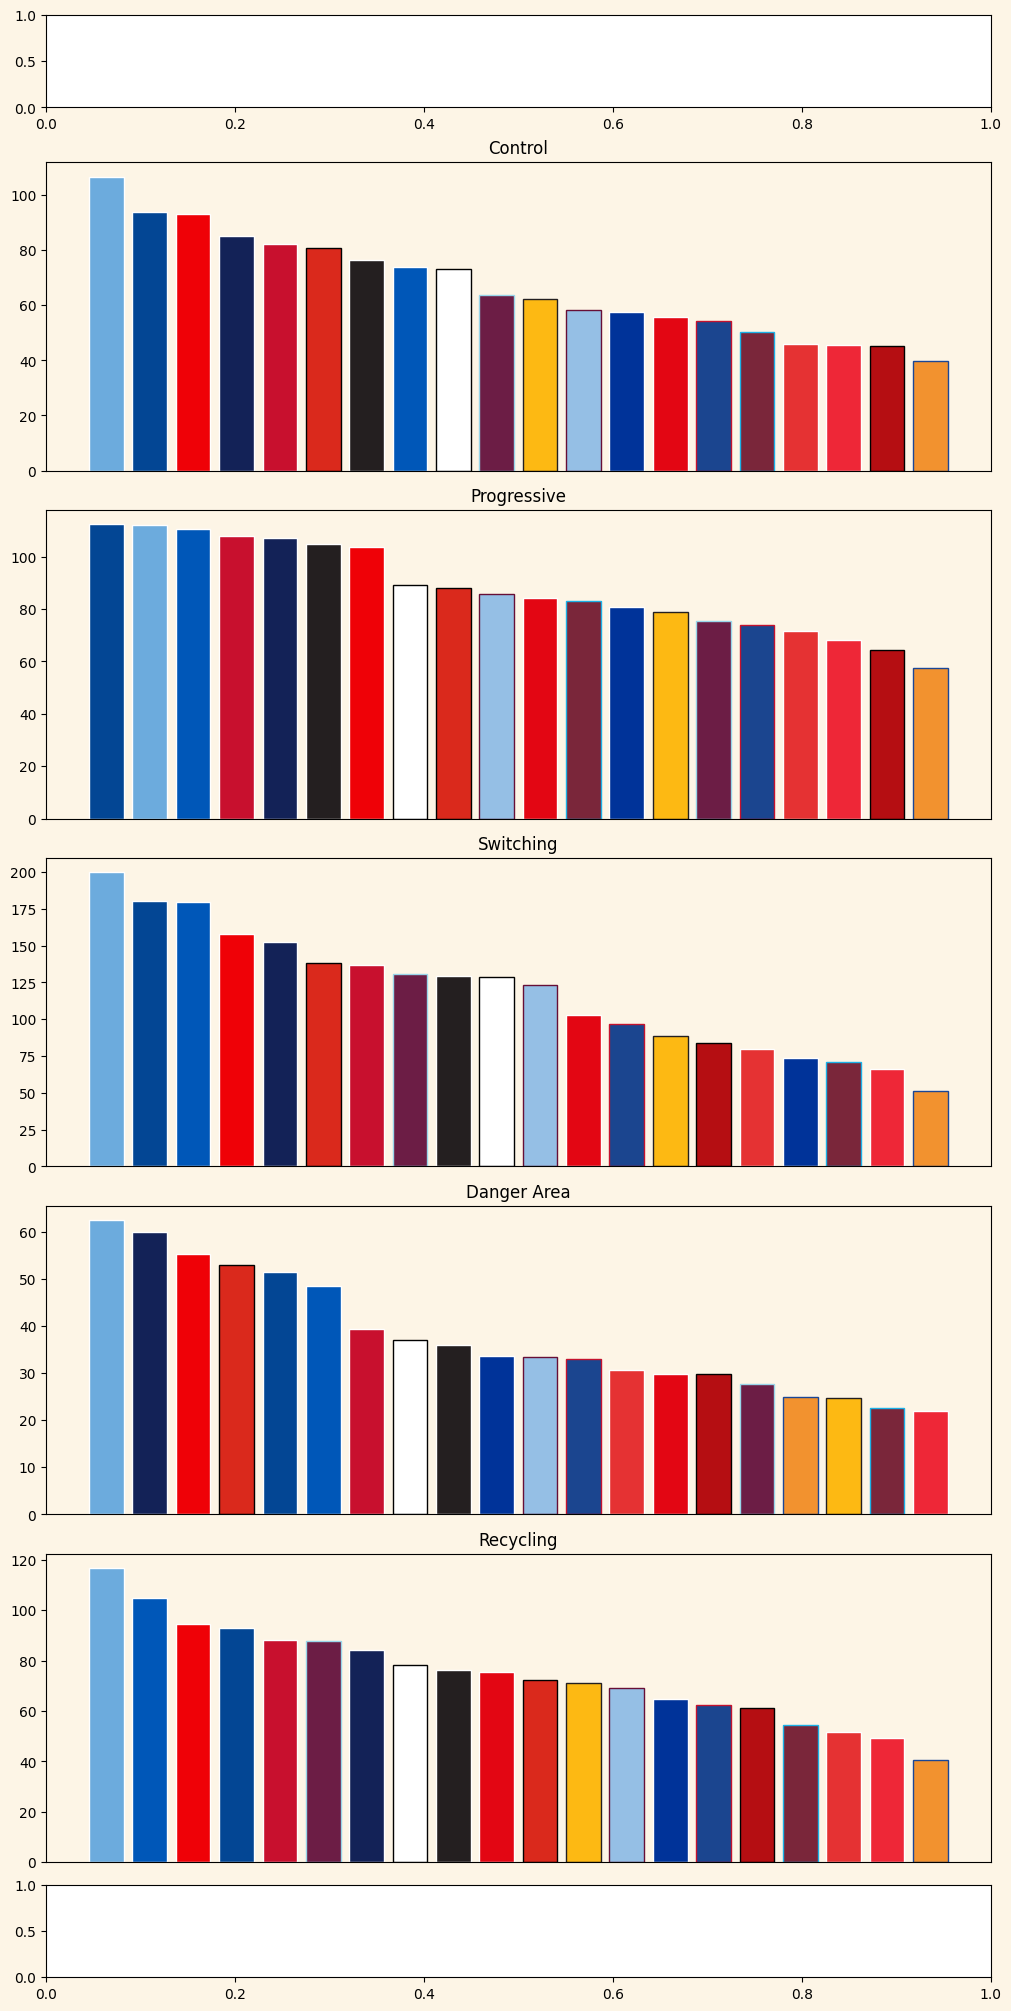

In [40]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,20), constrained_layout=True, facecolor='oldlace')
ax = fig.subplot_mosaic([['Title'],['Control'],['Progressive'],['Switching'],['Danger Area'],['Recycling'],['Footer']],
                        height_ratios=[0.3,1,1,1,1,1,0.3])

for pass_type in CLUSTER_TYPES.keys():
    #bar chart
    open_play_data=open_play_data.sort_values(pass_type,ascending=False)
    ax[pass_type].bar(open_play_data.index,open_play_data[pass_type],color=open_play_data['color1'], lw=1, edgecolor=open_play_data['color2'])
    ax[pass_type].set_facecolor('oldlace')
    ax[pass_type].set_title(pass_type)
    ax[pass_type].set_xticks([])

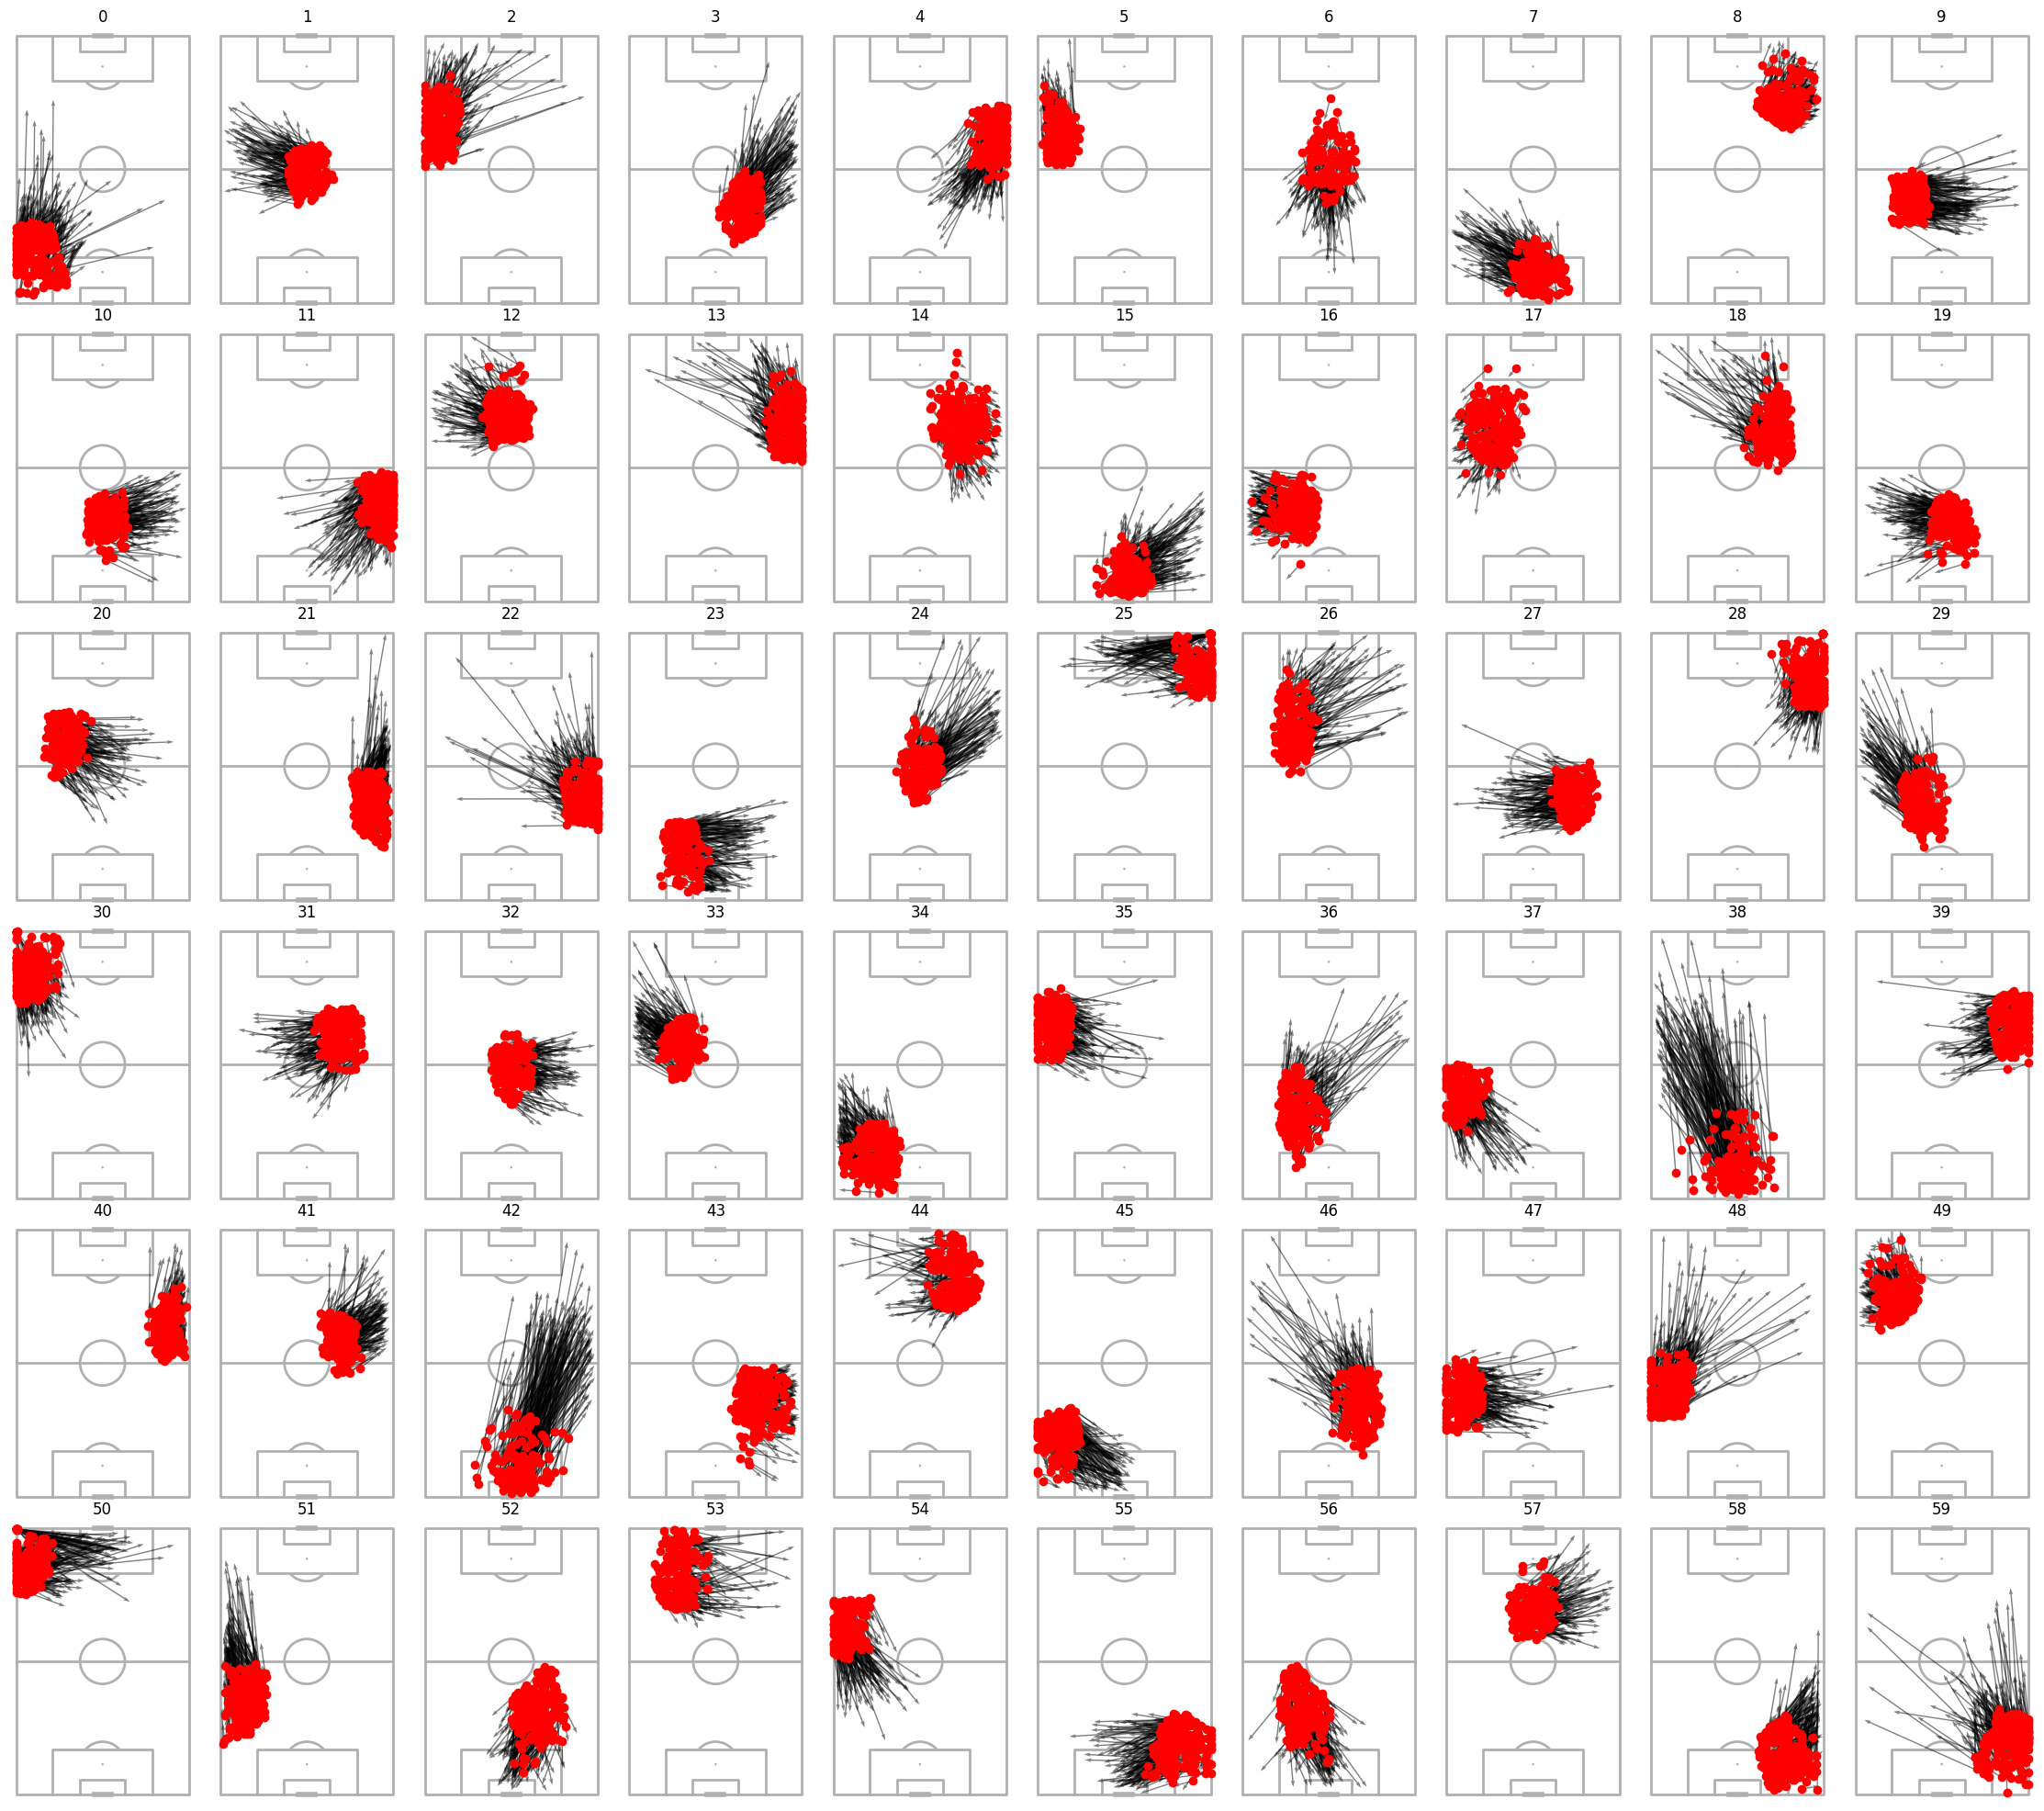

In [8]:
p = VerticalPitch('opta')
fig, axes = p.grid(nrows=6,ncols=10, endnote_height=0, title_height=0, figheight=27);
for i, ax in enumerate(axes.flatten()):
  ax.set_title(i)
  selected_cluster_data = data.loc[(data['cluster']==i)]
  if len(selected_cluster_data)>200:
    selected_cluster_data=selected_cluster_data.head(200)
  p.arrows(selected_cluster_data['x'], selected_cluster_data['y'], selected_cluster_data['endX'], selected_cluster_data['endY'], ax=ax, alpha=0.5, width=1)
  p.scatter(selected_cluster_data['x'], selected_cluster_data['y'], c='red', ax=ax)